# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Calculate the PDF from a given dataset containing real-valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn

## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [2]:
data = pd.read_csv("weight-height.csv")
male_df =  data.loc[data.Gender == 'Male']
female_df =  data.loc[data.Gender == 'Female']
print(male_df["Height"].mean())
print(male_df["Height"].std())
print(male_df["Weight"].mean())
print(male_df["Weight"].std())

print(female_df["Height"].mean())
print(female_df["Height"].std())
print(female_df["Weight"].mean())
print(female_df["Weight"].std())

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

69.02634590621741
2.863362228660647
187.0206206581932
19.7811545167638
63.70877360342507
2.696284015765054
135.86009300746835
19.022467805319028


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- use binsize = 10, set alpha level so that overlap can be visualized

<AxesSubplot:ylabel='Frequency'>

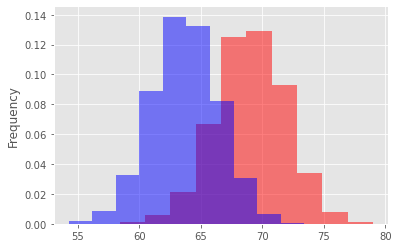

In [29]:
# Your code here
fig, ax = plt.subplots()
# male_df.plot.hist(y="Height", color="red", ax=ax, alpha=0.5, bins=10)
# female_df.plot.hist(y="Height", color="blue", ax=ax, alpha=0.5, bins=10)

male_df.Height.plot.hist(color="red", ax=ax, alpha=0.5, bins=10, density=True)
female_df.Height.plot.hist(color="blue", ax=ax, alpha=0.5, bins=10, density=True)


In [4]:
# Record your observations - are these inline with your personal observations?
# Yes

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use`np.hist`
- The function should return two lists carrying x and y coordinates for plotting the density function

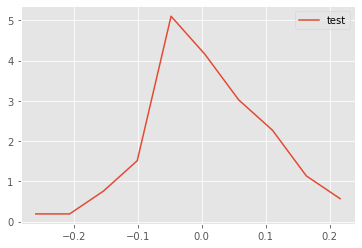

In [26]:
def density(x):
    n, bins = np.histogram(x, bins=10, density=1)
    y = np.zeros(n.size)
    for k in range(n.size):
        y[k] = 0.5*(bins[k]+bins[k+1])
    return y, n

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add Overlapping density plots to the histograms plotted earlier

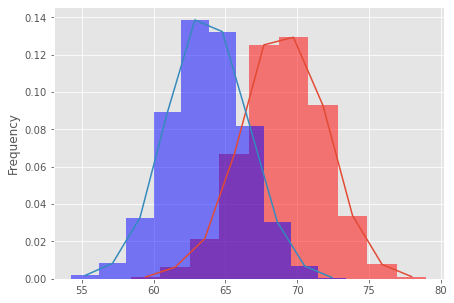

In [32]:
# You code here 
import seaborn as sns
# fig, ax = plt.subplots()
# male_df.plot.hist(y="Height", color="red", ax=ax, alpha=0.5, bins=10)
# female_df.plot.hist(y="Height", color="blue", ax=ax, alpha=0.5, bins=10)

plt.figure(figsize=(7,5))
male_df.Height.plot.hist(color="red", alpha=0.5, bins=10, density=True)
female_df.Height.plot.hist(color="blue", alpha=0.5, bins=10, density=True)

# print(list(male_df.Height))
x,y = density(list(male_df.Height))
plt.plot(x, y)

x1,y1 = density(list(female_df.Height))
plt.plot(x1, y1)
plt.show()

# df = pd.DataFrame({
#     'x': x,
#     'y': y   
# })
# df['x.plot.hist(x='x', y='y')
# fig.show()

# x1,y1 = density(female_df.Height)
# plt.plot(x1,y1)
# plt.show()

## Repeat above exerice for male and female weights

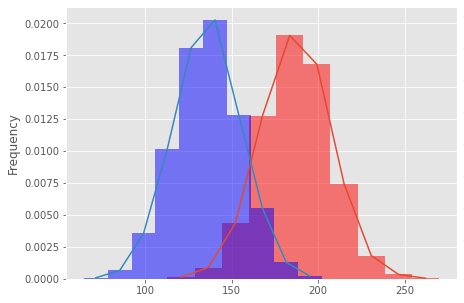

In [33]:
# Your code here 

plt.figure(figsize=(7,5))
male_df.Weight.plot.hist(color="red", alpha=0.5, bins=10, density=True)
female_df.Weight.plot.hist(color="blue", alpha=0.5, bins=10, density=True)

# print(list(male_df.Height))
x,y = density(list(male_df.Weight))
plt.plot(x, y)

x1,y1 = density(list(female_df.Weight))
plt.plot(x1, y1)
plt.show()

## Write your observations in the cell below

In [8]:
# Record your observations - are these inline with your personal observations?
# Yes definitely! 

# What is the takeaway when comparing male and female heights and weights?
# Males are more likely to weight more and be taller than females

## Repeat Above experiments in seaborn and compare with your results

<AxesSubplot:xlabel='Height', ylabel='Density'>

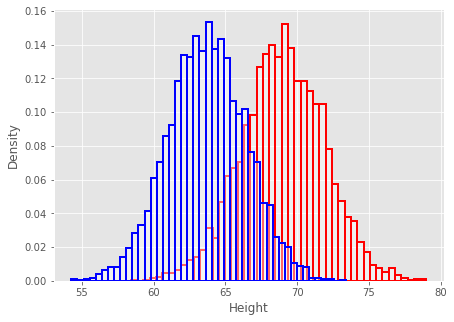

In [35]:
# Code for heights here
plt.figure(figsize=(7,5))
sns.histplot(male_df.Height,
             linewidth=2,
             edgecolor="r",
             alpha=0.4,
             color="w",
             label="Histogram",
             stat="density")

sns.histplot(female_df.Height,
             linewidth=2,
             edgecolor="b",
             alpha=0.4,
             color="w",
             label="Histogram",
             stat="density")


<AxesSubplot:xlabel='Weight', ylabel='Density'>

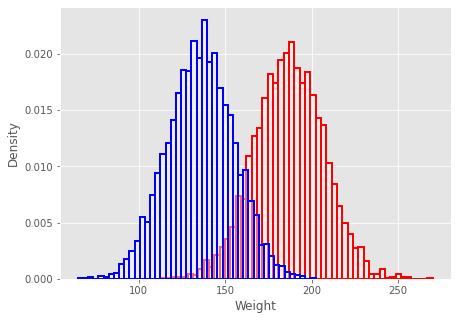

In [36]:
# Code for weights here
plt.figure(figsize=(7,5))
sns.histplot(male_df.Weight,
             linewidth=2,
             edgecolor="r",
             alpha=0.4,
             color="w",
             label="Histogram",
             stat="density")

sns.histplot(female_df.Weight,
             linewidth=2,
             edgecolor="b",
             alpha=0.4,
             color="w",
             label="Histogram",
             stat="density")

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are? They are very similar, but sns is easier (less code)

## Summary

In this lesson you learned how to build the probability density curves visually for a given datasets, and compare the distributions visually by looking at the spread, center and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.